In [3]:
import networkx as nx
import pandas as pd
from datetime import datetime

from sklearn.cluster import SpectralClustering
from sklearn import metrics

In [5]:
nx.__version__

'2.5'

In [40]:
path="./data/soc-sign-bitcoinotc.csv"
data=pd.read_csv(path)

data["TIME"]=data.TIME.apply(lambda x: datetime.fromtimestamp(x))
data.shape

(35592, 4)

In [46]:
select = data[['SOURCE', 'TARGET', 'RATING']]
data_lists = [select.columns.values.tolist()] + select.values.tolist()
attr={"weight":data.RATING.tolist()}

In [44]:
select = data[['SOURCE', 'TARGET', 'RATING']]
select.head()

,SOURCE,TARGET,RATING
0,6,2,4
1,6,5,2
2,1,15,1
3,4,3,7
4,13,16,8


In [8]:
G = nx.DiGraph(data_lists[1:200],**attr)
all_weights=[]
for (node1,node2,data) in G.edges(data=True):
    print(data)
    #all_weights.append() #we'll use this when determining edge thickness

unique_weights = list(set(all_weights))

#4 c. Plot the edges - one by one!
for weight in unique_weights:
    #4 d. Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    width = weight
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}


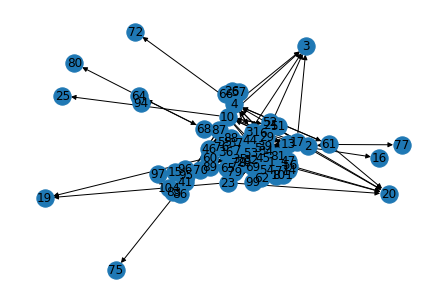

In [9]:
import matplotlib.pyplot as plt

G = nx.DiGraph(data_lists[1:200],**attr)
nx.draw(G, with_labels=True)
plt.show()

In [13]:
CD = nx.degree_centrality(G) # centralité degré
#nx.in_degree_centrality(G)
#nx.out_degree_centrality(G)

VCP = nx.eigenvector_centrality(G) # centralité vecteur propre

CP = nx.closeness_centrality(G) # centralité proximité

CI = nx.betweenness_centrality(G)  # centralité intermédiarité

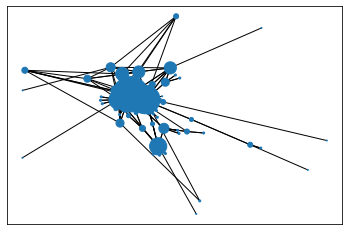

In [37]:
CD = nx.degree_centrality(G)
size = [5000*x**2 for x in CD.values()]
nx.draw_networkx(G, node_size=size, with_labels=False, arrowsize=1, arrows=False)

In [63]:
DG = nx.DiGraph()
liste = [(i,j,1000*k) for (i,j,k) in zip(data['SOURCE'], data['TARGET'], data['RATING'])]
DG.add_weighted_edges_from(liste[0:200])

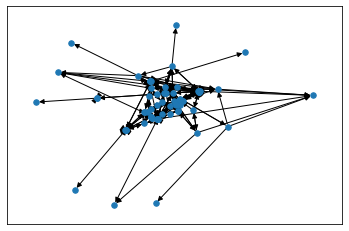

In [67]:
nx.draw_networkx(DG, with_labels=False, node_size=30)

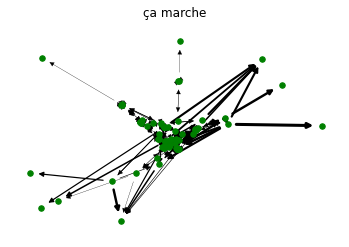

In [84]:
def plot_weighted_graph(G, node_size=30, edge_size=2.0, title="ça marche", save_name=None):
    "Plot a weighted graph"
    
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='green', node_size=node_size)
    
    all_weights = []
    #4 a. Iterate through the graph nodes to gather all the weights
    for (node1, node2, data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #4 b. Get unique weights
    unique_weights = list(set(all_weights))
 
    #4 c. Plot the edges - one by one!
    for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1, node2) for (node1, node2, edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(G.nodes())*edge_size/sum(all_weights)
        nx.draw_networkx_edges(G, pos, edgelist=weighted_edges, width=width)
 
    #Plot the graph
    plt.axis('off')
    plt.title(title)
    
    if save_name is not None:
        plt.savefig(save_name)
        
    plt.show() 
    
plot_weighted_graph(DG)

In [133]:
def draw_communaute(G, with_labels=False, node_size=30):
    
    # extraction des communauté
    communities_generator = nx.algorithms.community.girvan_newman(G)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    communities = sorted(map(sorted, next_level_communities))

    # mise dans un dico
    communaute = {}
    j = 0
    for i in communities:
        communaute[j] = i
        j += 1

    # dico des couleurs    
    C = len(communities)
    liste_couleur = {}
    for i in range(C):
        liste_couleur[i] = (1,i/(C-1),0) # couleur RGB (a,b,c) valeur de a,b,c entre 0 et 1

    # map nodes - couleur
    couleur_node = {}
    for j in communaute:
        for i in communaute[j]:
            couleur_node[i] = liste_couleur[j]   

    # lsite finale pour l'argument node_color de nx.draw_networkx
    liste_couleur_node = []
    for i in DG.nodes():
        liste_couleur_node.append(couleur_node[i])
    
    nx.draw_networkx(DG, with_labels=with_labels, node_size=node_size, node_color = liste_couleur_node)
    plt.axis('off')
    


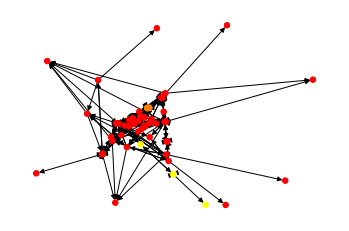

In [132]:
draw_communaute(DG)

In [10]:
# Get ground-truth: club-labels -> transform to 0/1 np-array
#     (possible overcomplicated networkx usage here)
gt_dict = nx.get_node_attributes(G, 'club')
gt = [gt_dict[i] for i in G.nodes()]
gt = np.array([0 if i == 'Mr. Hi' else 1 for i in gt])

# Get adjacency-matrix as numpy-array
adj_mat = nx.to_numpy_matrix(G)

print('ground truth')
print(gt)

# Cluster
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(adj_mat)

# Compare ground-truth and clustering-results
print('spectral clustering')
print(sc.labels_)
print('just for better-visualization: invert clusters (permutation)')
print(np.abs(sc.labels_ - 1))

# Calculate some clustering metrics
print(metrics.adjusted_rand_score(gt, sc.labels_))
print(metrics.adjusted_mutual_info_score(gt, sc.labels_))

SyntaxError: invalid syntax (<ipython-input-10-6fc96b79b1c5>, line 2)